In [1]:
import sys
sys.path.append('../build')
import IPSModule as ips
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import lattpy as lp

1.122462048309373


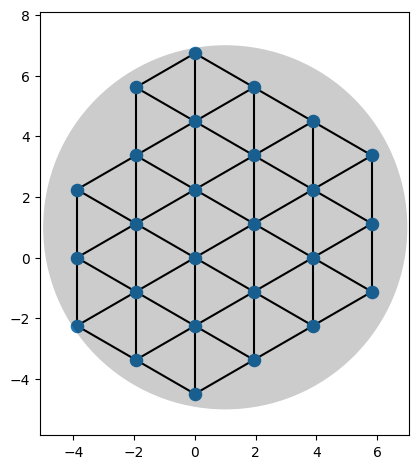

NameError: name 'latt1' is not defined

In [ ]:
gamma = 1
temperature = 0.5
rad = 10.0

epsilon = 1.0
sigma = 1.0

init_dis = 2 ** (1.0 / 6.0) * sigma
np.random.seed(42)  # for reproducibility
print(init_dis)

# generate the initial configuration
_dis = init_dis * 2 / np.sqrt(3)
# _dis = init_dis * 2
latt = lp.Lattice.hexagonal(a = _dis)
# latt = lp.Lattice.square(a = _dis)
latt.add_atom()
latt.add_connections()
s = lp.Circle((1, 1), radius=6)
# s = lp.Donut((1, 1), radius_outer = 6, radius_inner = 2)
latt.build(shape = s, primitive=True)
ax = latt.plot()
s.plot(ax)
plt.show()

num_particles = latt.data.positions.shape[0]

init_particles_positions = latt.data.positions
p = ips.LangevinSystem(num_particles, gamma, temperature)

for i in range(num_particles):
    for d in range(2):
        p.get_positions()[d][i] = init_particles_positions[i][d] / 2
        p.get_velocities()[d][i] = 0.0

pair_force_config = {
    "type": "LennardJones",
    "eps": epsilon,
    "sigma": sigma
}

confinement_config = {
    "type": "Radial",
    "rad": rad
}
simulator = ips.IPS_Simulator_Langevin(p)
simulator.init(pair_force_config, confinement_config)

In [ ]:
from utils import SimulationVisualizer

num_frames = 100
num_step = 1500000
sim_visualizer = SimulationVisualizer(simulator=simulator, particle_system=p, rad = 10, draw_interval=num_step // num_frames, dt = 0.001)

html = sim_visualizer.run_animation(num_step)
display(html)
# sim_visualizer.run_animation_to_gif(num_step, "test1.gif")

Running animation for 150000 steps
Output number of frames: 100
